In [1]:
import os
import sys

path = '/home/seq/pelenet'
sys.path.append(path)
os.chdir(path)

In [31]:
# Allow reload of objects
%load_ext autoreload
%autoreload

from pelenet.utils import Utils
from pelenet.experiments.assemblies import AssemblyExperiment
from pelenet.experiments.assembliesoutput import AssemblyOutputExperiment

# Official modules
import numpy as np
from scipy import sparse
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 9,  # Random seed
    'trials': 50, #20,  # Number of trials
    'stepsPerTrial': 40, #40, #50,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 35, #40, #35 # Number of connections per neuron
    # Noise
    'isNoise': True,
    'onlyExcitatory': True,  # Noisy input is only excitatory
    'noiseMaxWeight': 120, #120,
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100, #100 # Voltage time constant
    'currentTau': 6, #5 # Current time constant
    'thresholdMant': 1000, #1200,  # Spiking threshold for membrane potential
    # Plasticity
    'isLearningRule': True,
    'learningEpoch': 4,
    'learningRule': '2^-4*x1*y1*x0*y0 - 2^-3*y0*w*w',
    # Input
    'inputIsAlternating': True,
    'inputAlternatingNum': 1,
    'inputOffset': 20, #10,
    'inputGenSpikeProb': 0.8,  # Probability of spikes for the spike generators
    'inputNumTargetNeurons': 40,  # Number of neurons targeted by the spike generators
    'inputSteps': 30, #20, #30,  # Number of steps the input is active
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [4]:
# Initilizes the experiment and utils
exp = AssemblyExperiment(name='assemblies', parameters=parameters)
utils = Utils.instance()

In [5]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

0.9264137460213924

In [6]:
#exp.net.plot.initialExWeightDistribution()

In [7]:
#exp.net.noiseWeights.toarray()[:20,:20]

In [8]:
pars = exp.net.p

In [9]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:36753
INFO:DRV:      Host server up..............Done 0.51s
INFO:DRV:      Encoding axons/synapses.....Done 0.28s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1635854341.8772705
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1635854341.8772705/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/

INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1635854341.8772705/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 60, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61 to 70
INFO:HST:  chip=0 cpu=0 Reset functional state at 70
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 121 to 130
INFO:HST:  chip=0 cpu=0 Reset functional state at 130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 181 to 190
INFO:HST:  chip=0 cpu=0 Reset functional state at 190
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 241 to 250
INFO:HST:  chip=0 cpu=0 Reset functional state at 250
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 301 to 31

INFO:HST:  chip=0 cpu=0 Reset functional state at 2230
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2281 to 2290
INFO:HST:  chip=0 cpu=0 Reset functional state at 2290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2341 to 2350
INFO:HST:  chip=0 cpu=0 Reset functional state at 2350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2401 to 2410
INFO:HST:  chip=0 cpu=0 Reset functional state at 2410
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2461 to 2470
INFO:HST:  chip=0 cpu=0 Reset functional state at 2470
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2521 to 2530
INFO:HST:  chip=0 cpu=0 Reset functional state at 2530
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2581 to 2590
INFO:HST:  chip=0 cpu=0 Reset functional state at 2590
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2641 to 2650
INFO:HST:  chip=0 cpu=0 Reset functional state at 2650
INFO:HST:  chip=0 cpu=0 Reset current/volt

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [35]:
from matplotlib import rcParams

In [43]:
exp.net.plot.plotDir

'/home/seq/pelenet/log/2021-11-02_12-58-53_assemblies/plots/'

In [44]:
exp2.net.plot.plotDir

'/home/seq/pelenet/log/2021-11-02_13-00-27_assemblies-2/plots/'

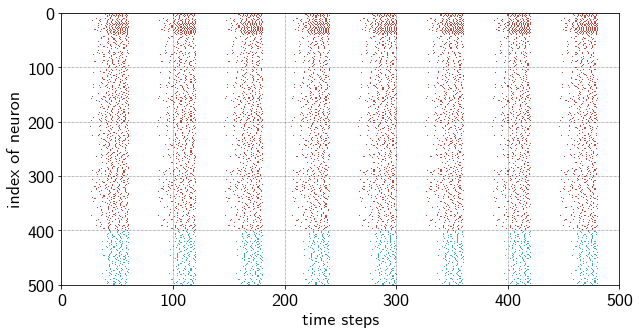

In [36]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
rcParams['font.size'] = 18
exp.net.plot.reservoirSpikeTrain(figsize=(10,5), fr=0, to=500)

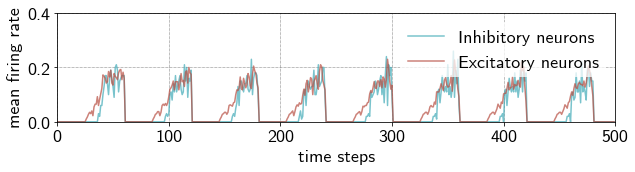

In [37]:
exp.net.plot.reservoirRates(figsize=(10,2), ylim=(0,0.4), fr=0, to=500, legend_loc='upper right')

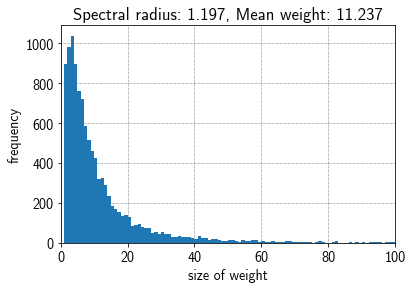

In [12]:
exp.net.plot.initialExWeightDistribution(figsize=(6,4), xlim=(0,100))

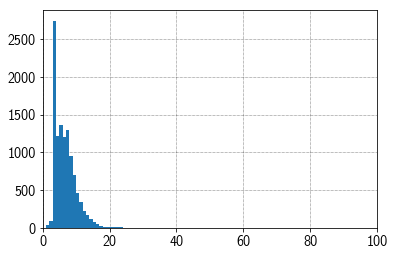

In [13]:
#exp.net.plot.trainedExWeightDistribution(figsize=(6,4), xlim=(0,100))

wgt = exp.net.trainedWeightsExex[-1].toarray().flatten()
nz = np.array(np.nonzero(wgt)[0])

plt.hist(wgt[nz], bins=np.arange(np.max(wgt[nz])))
plt.xlim((0,100))
pl = plt.show()

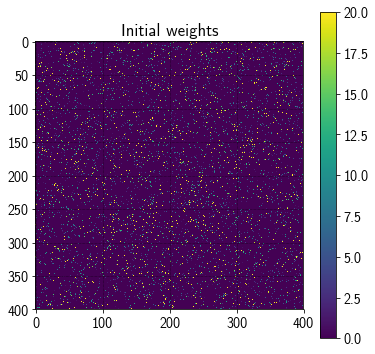

In [14]:
# Weight matrix before learning
exp.net.plot.initialExWeightMatrix()

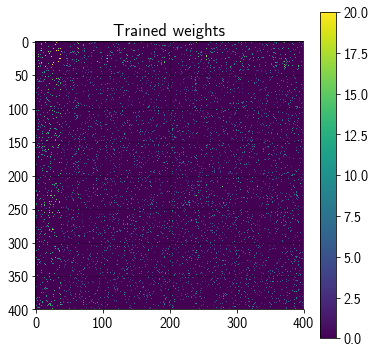

In [15]:
# Weight matrix after learning
exp.net.plot.trainedExWeightMatrix()

In [16]:
size = exp.p.inputNumTargetNeurons

input_regions = exp.net.trainedWeightsExex[-1].toarray()[:2*size,:2*size]

inp_lt = input_regions[:size,:size]
inp_rt = input_regions[size:,:size]
inp_lb = input_regions[:size,size:]
inp_rb = input_regions[size:,size:]

print(np.mean(inp_lt), np.mean(inp_rt), np.mean(inp_lb), np.mean(inp_rb))

1.13375 0.828125 0.5775 0.40125


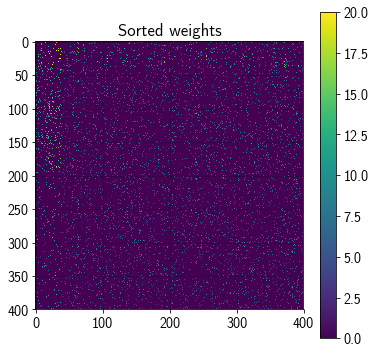

In [17]:
# Sorted weight matrix after learning
expSupportMask = utils.getSupportWeightsMask(exp.net.trainedWeightsExex[-1])
exp.net.plot.weightsSortedBySupport(expSupportMask, exp.net.trainedWeightsExex[-1])

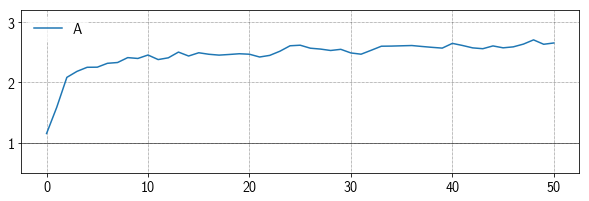

In [18]:
cluster_mean = []
all_mean = []

cluster_mean.append(np.mean(exp.net.initialWeights.exex[:40,:40]))
all_mean.append(np.mean(exp.net.initialWeights.exex))

for i in range(exp.p.trials):
    cluster_mean.append(np.mean(exp.net.trainedWeightsExex[i][:40,:40]))
    all_mean.append(np.mean(exp.net.trainedWeightsExex[i]))

cluster_mean = np.array(cluster_mean)
all_mean = np.array(all_mean)

x = cluster_mean/all_mean
plt.figure(figsize=(10,3))
plt.axhline(y=1, color='black', linewidth=0.5)
plt.plot(x, label='A')
plt.ylim((0.5, np.max(x)+0.5))
plt.legend()
pl = plt.show()

In [19]:
# New parameters
newParameters = {
    **parameters,
    'trials': 2*exp.p.trials,
    'inputAlternatingNum': 2
}

In [20]:
# Initilizes a second experiment
exp2 = AssemblyExperiment(name='assemblies-2', parameters=newParameters)

In [21]:
# Get weights from previous experiment
weights = deepcopy(exp.net.initialWeights)
weights.exex = exp.net.trainedWeightsExex[-1]

# Build experiment
exp2.build()
exp2.net.initialMasks = exp.net.initialMasks
exp2.net.initialWeights = weights

In [22]:
# Run network
exp2.run()

INFO:DRV:  Connecting to 127.0.0.1:41925
INFO:DRV:      Host server up..............Done 1.09s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1635854436.9286203
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1635854436.9286203/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.

INFO:DRV:      Configuring registers.......Done 0.45s
INFO:DRV:      Transferring spikes.........Done 2.25s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.6/site-packages/nxsdk/driver/compilers/../../../temp/1635854436.9286203/launcher_chip0_lmt0.bin --chips=1 --remote-relay=0 --epoch=4 
INFO:HST:  Lakemont_driver...
INFO:HST:  chip=0 cpu=0 Transfered values 20, 60, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 61 to 70
INFO:HST:  chip=0 cpu=0 Reset functional state at 70
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 121 to 130
INFO:HST:  chip=0 cpu=0 Reset functional state at 130
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 181 to 190
INFO:HST:  chip=0 cpu=0 Reset functional state at 190
INFO:HST:  chip=0 cpu=0 Reset current/volt

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1801 to 1810
INFO:HST:  chip=0 cpu=0 Reset functional state at 1810
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1861 to 1870
INFO:HST:  chip=0 cpu=0 Reset functional state at 1870
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1921 to 1930
INFO:HST:  chip=0 cpu=0 Reset functional state at 1930
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 1981 to 1990
INFO:HST:  chip=0 cpu=0 Reset functional state at 1990
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2041 to 2050
INFO:HST:  chip=0 cpu=0 Reset functional state at 2050
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2101 to 2110
INFO:HST:  chip=0 cpu=0 Reset functional state at 2110
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2161 to 2170
INFO:HST:  chip=0 cpu=0 Reset functional state at 2170
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2221 to 2230
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3781 to 3790
INFO:HST:  chip=0 cpu=0 Reset functional state at 3790
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3841 to 3850
INFO:HST:  chip=0 cpu=0 Reset functional state at 3850
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3901 to 3910
INFO:HST:  chip=0 cpu=0 Reset functional state at 3910
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3961 to 3970
INFO:HST:  chip=0 cpu=0 Reset functional state at 3970
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4021 to 4030
INFO:HST:  chip=0 cpu=0 Reset functional state at 4030
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4081 to 4090
INFO:HST:  chip=0 cpu=0 Reset functional state at 4090
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4141 to 4150
INFO:HST:  chip=0 cpu=0 Reset functional state at 4150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4201 to 4210
INFO:HST:  chip=0 cpu=0

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5761 to 5770
INFO:HST:  chip=0 cpu=0 Reset functional state at 5770
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5821 to 5830
INFO:HST:  chip=0 cpu=0 Reset functional state at 5830
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5881 to 5890
INFO:HST:  chip=0 cpu=0 Reset functional state at 5890
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 5941 to 5950
INFO:HST:  chip=0 cpu=0 Reset functional state at 5950
INFO:DRV:      Executing...................Done 145.82s
INFO:DRV:      Processing timeseries.......Done 4.67s
INFO:DRV:  Executor: 6000 timesteps........Done 153.29s
INFO:HST:  chip=0 cpu=0 halted, status=0x0


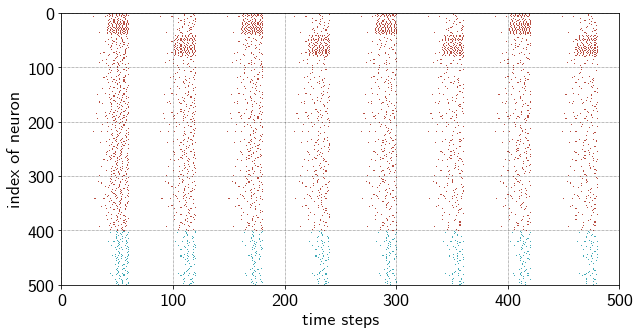

In [38]:
exp2.net.plot.reservoirSpikeTrain(figsize=(10,5), fr=0, to=500)

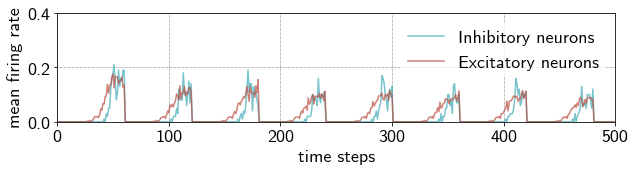

In [39]:
exp2.net.plot.reservoirRates(figsize=(10,2), ylim=(0,0.4), fr=0, to=500, legend_loc='upper right')

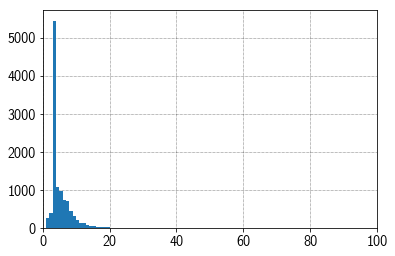

In [25]:
wgt = exp2.net.trainedWeightsExex[-1].toarray().flatten()
nz = np.array(np.nonzero(wgt)[0])

plt.hist(wgt[nz], bins=np.arange(np.max(wgt[nz])))
plt.xlim((0,100))
pl = plt.show()

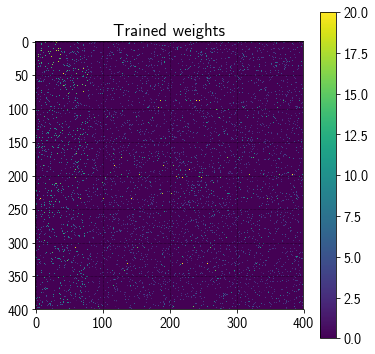

In [26]:
# Weight matrix after learning
exp2.net.plot.trainedExWeightMatrix()

In [27]:
size = exp2.p.inputNumTargetNeurons

input_regions = exp2.net.trainedWeightsExex[-1].toarray()[:2*size,:2*size]

inp_lt = input_regions[:size,:size]
inp_rt = input_regions[size:,:size]
inp_lb = input_regions[:size,size:]
inp_rb = input_regions[size:,size:]

print(np.mean(inp_lt), np.mean(inp_rt), np.mean(inp_lb), np.mean(inp_rb))

0.935 0.43125 0.406875 0.80375


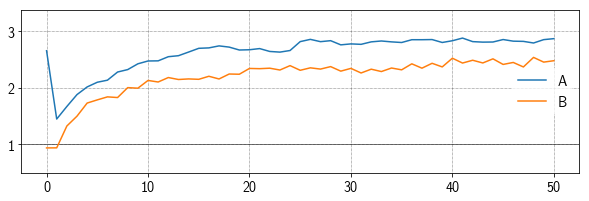

In [28]:
cluster1_mean = []
cluster2_mean = []
all_mean = []

cluster1_mean.append(np.mean(exp2.net.initialWeights.exex[:size,:size]))
cluster2_mean.append(np.mean(exp2.net.initialWeights.exex[size:2*size,size:2*size]))
all_mean.append(np.mean(exp2.net.initialWeights.exex))

for i in range(exp.p.trials):
    cluster1_mean.append(np.mean(exp2.net.trainedWeightsExex[i][:size,:size]))
    cluster2_mean.append(np.mean(exp2.net.trainedWeightsExex[i][size:2*size,size:2*size]))
    all_mean.append(np.mean(exp2.net.trainedWeightsExex[i]))

cluster1_mean = np.array(cluster1_mean)
cluster2_mean = np.array(cluster2_mean)
all_mean = np.array(all_mean)

c1 = cluster1_mean/all_mean
c2 = cluster2_mean/all_mean
plt.figure(figsize=(10,3))
plt.axhline(y=1, color='black', linewidth=0.5)
plt.plot(c1, label='A')
plt.plot(c2, label='B')
plt.ylim((0.5, np.max([c1, c2])+0.5))
plt.legend()
pl = plt.show()

In [29]:
# Store data
weights = {
    'initial': exp.net.initialWeights.exex,
    'train1': exp.net.trainedWeightsExex,
    'train2': exp2.net.trainedWeightsExex
}

np.savez_compressed('data/assemblies/weights_seed-'+str(exp.p.seed)+'.npz', **weights)